# Proyecto 2
## Modelo CNN para la clasificación de imágenes. 80%
### by: Luis Hector Camarillo Amador

Note: you may need to restart the kernel to use updated packages.


In [68]:
from keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from PIL import Image, ImageFilter, ImageEnhance
import cv2

In [46]:
# Configuracion Inicial
IMG_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 10

# Directorios 
train_dir = '/home/relka/Descargas/Diplomado_Oficial/Módulo 6 - Redes Neuronales profundas/Proyecto2/seg_train/seg_train'
test_dir = '/home/relka/Descargas/Diplomado_Oficial/Módulo 6 - Redes Neuronales profundas/Proyecto2/seg_test/seg_test'
pred_dir = '/home/relka/Descargas/Diplomado_Oficial/Módulo 6 - Redes Neuronales profundas/Proyecto2/seg_pred/'



In [3]:
# Cargamos los datos de entrenamiento
filepaths_train, labels_train = [], []
for i in os.listdir(train_dir):
    foldpath = os.path.join(train_dir, i)
    for j in tqdm(os.listdir(foldpath)):
        filepaths_train.append(os.path.join(foldpath, j))
        labels_train.append(i)

100%|██████████| 2274/2274 [00:00<00:00, 1005147.78it/s]


In [4]:
# Cargamos los datos de prueba
filepaths_test, label_test = [],[]
for i in os.listdir(test_dir):
    foldpath = os.path.join(test_dir, i)
    for j in tqdm(os.listdir(foldpath)):
        filepaths_test.append(os.path.join(foldpath, j))
        label_test.append(i)


100%|██████████| 510/510 [00:00<00:00, 536921.45it/s]


In [47]:
# Cargamos los datos que usaremos para predicir
filepaths_pred, label_pred = [], []
for i in os.listdir(pred_dir):
    foldpath=os.path.join(pred_dir,i)
    for j in tqdm(os.listdir(foldpath)):
        filepaths_pred.append(os.path.join(foldpath,j))
        label_pred.append(i)


100%|██████████| 7301/7301 [00:00<00:00, 1051275.82it/s]


In [48]:
df_train = pd.DataFrame({'filepath_train':filepaths_train, 'label_train':labels_train})
df_test = pd.DataFrame({'filepath_test':filepaths_test, 'label_test':label_test})
df_pred = pd.DataFrame({'filepath_pred':filepaths_pred, 'label_pred':label_pred})



,filepath_pred,label_pred
0,/home/relka/Descargas/Diplomado_Oficial/Módulo...,seg_pred
1,/home/relka/Descargas/Diplomado_Oficial/Módulo...,seg_pred
2,/home/relka/Descargas/Diplomado_Oficial/Módulo...,seg_pred
3,/home/relka/Descargas/Diplomado_Oficial/Módulo...,seg_pred
4,/home/relka/Descargas/Diplomado_Oficial/Módulo...,seg_pred


/tmp/ipykernel_32657/2962469480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train['label_train'], palette=color)
/tmp/ipykernel_32657/2962469480.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_test['label_test'], palette=color)


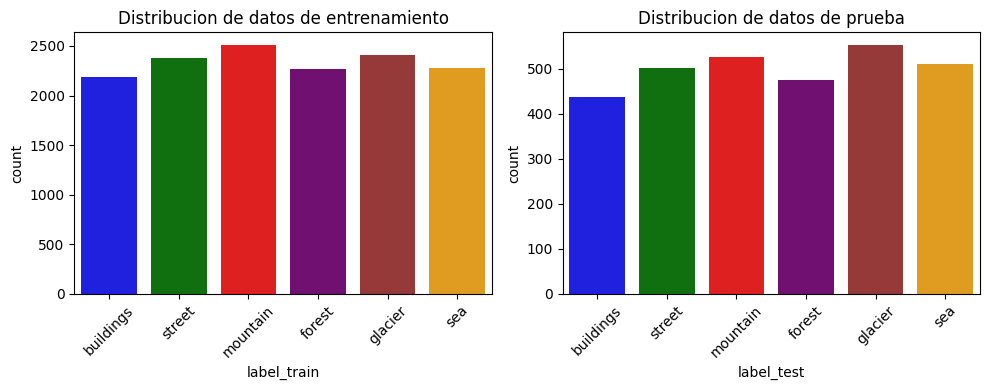

In [ ]:
## Graficar la distribución de los datos
color = ['blue', 'green', 'red', 'purple', 'brown','orange']
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=df_train['label_train'], palette=color)
plt.title('Distribucion de datos de entrenamiento')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.countplot(x=df_test['label_test'], palette=color)
plt.title('Distribucion de datos de prueba')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Preprcesamiento de datos

data_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range=20,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              horizontal_flip=True,
                              validation_split=0.2)


train_gen = data_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_gen = data_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

class_dict = train_gen.class_indices


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [ ]:
data_test_gen = ImageDataGenerator(rescale=1./255)
test_generator = data_test_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 3000 images belonging to 6 classes.


In [12]:
# Creacion del modelo CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adamax


In [13]:
model= Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

/home/relka/Descargas/OneDrive_1_27-3-2025/Python/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-14 10:17:56.854688: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,814,534 (26.00 MB)

 Trainable params: 6,814,534 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Entreamiento del modelo
history = model.fit(train_gen,steps_per_epoch=train_gen.samples//BATCH_SIZE,epochs=EPOCHS,validation_data=validation_gen,validation_steps=validation_gen.samples//BATCH_SIZE)


/home/relka/Descargas/OneDrive_1_27-3-2025/Python/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 231s 658ms/step - accuracy: 0.3725 - loss: 1.5220 - val_accuracy: 0.6088 - val_loss: 1.0171
Epoch 2/10
  1/350 ━━━━━━━━━━━━━━━━━━━━ 2:35 445ms/step - accuracy: 0.6875 - loss: 0.9348

/home/relka/Descargas/OneDrive_1_27-3-2025/Python/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


350/350 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.6875 - loss: 0.9348 - val_accuracy: 0.5585 - val_loss: 1.0824
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 178s 507ms/step - accuracy: 0.5820 - loss: 1.0319 - val_accuracy: 0.5902 - val_loss: 1.0999
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.6562 - loss: 1.1193 - val_accuracy: 0.5582 - val_loss: 1.1230
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 187s 534ms/step - accuracy: 0.6670 - loss: 0.8783 - val_accuracy: 0.7353 - val_loss: 0.7247
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.7812 - loss: 0.6894 - val_accuracy: 0.6110 - val_loss: 1.0557
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 187s 533ms/step - accuracy: 0.6952 - loss: 0.8073 - val_accuracy: 0.7514 - val_loss: 0.6943
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.6562 - loss: 0.8180 - val_accuracy: 0.7205 - val_loss: 0.7980
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 190s 541ms/step - accuracy: 0.7407 - loss: 0.7088 - val

351/351 ━━━━━━━━━━━━━━━━━━━━ 60s 172ms/step - accuracy: 0.7943 - loss: 0.5770
[0.5738045573234558, 0.7931433916091919]
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8651 - loss: 0.4246
[0.5410568118095398, 0.809333324432373]
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 179ms/step - accuracy: 0.7885 - loss: 0.5925
[0.5938579440116882, 0.7874464988708496]


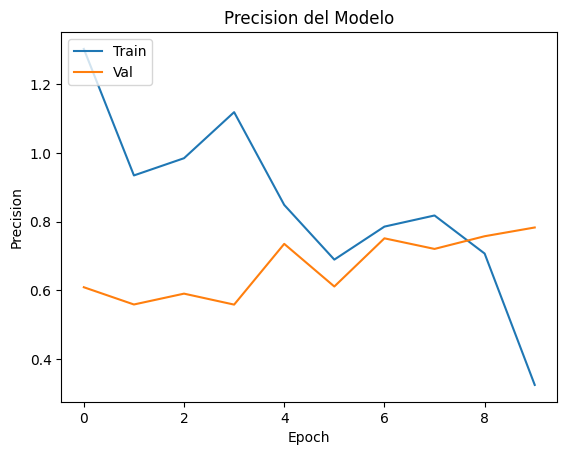

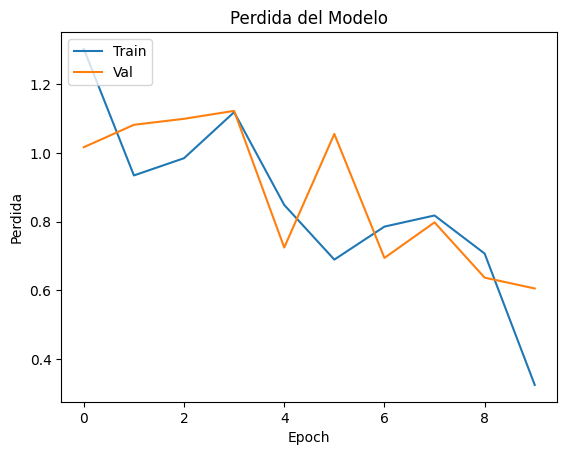

In [19]:
# Graficas de presicion y perdida

print(model.evaluate(train_gen))
print(model.evaluate(test_generator))
print(model.evaluate(validation_gen))

plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Precision del Modelo')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida del Modelo')
plt.ylabel('Perdida')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [69]:
# Creamos una funcion para predicir la clase de una imagen

def predict(img_path):
    try:
        label = list(class_dict.keys())
        print("Labels:", label)

        img = Image.open(img_path)
        resized_img = img.resize((IMG_SIZE, IMG_SIZE))
        img_array = np.asarray(resized_img) / 255.0

        img_array = np.expand_dims(img_array, axis=0)
        predictions = model.predict(img_array)
        probs = predictions[0]
        print("Probabilidad de predicción:", probs)

        plt.figure(figsize=(8, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(resized_img)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        bars = plt.barh(label, probs)
        plt.xlabel('Probabilidad')
        ax = plt.gca()
        ax.bar_label(bars, fmt='%.2f')
        plt.tight_layout()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

Labels: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Probabilidad de predicción: [2.0782740e-04 9.9958247e-01 8.8364555e-05 2.1635717e-05 3.4754719e-06
 9.6179145e-05]


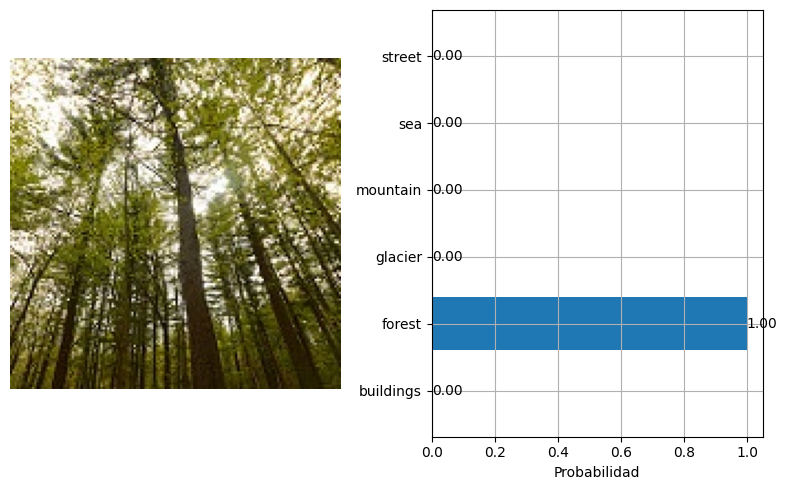

In [70]:
sample_img_path = df_pred.sample(1)['filepath_pred'].values[0]

predict(sample_img_path)

In [ ]:
# Dado los resultados obtenidos en el proyecto 2, se considera como buenas las predicciones hechas por el modelo.
# por lo que el uso de un filtro no es necesario.

